# 下采样 - 信号相位
此示例说明如何使用 downsample 获得信号的相位。以 M 为因子对信号下采样可以产生 M 个唯一相位。例如，如果您有一个离散时间信号 x，它具有 x(0) x(1) x(2) x(3)、...等，则 x 的 M 个相位是 x(nM + k)，其中 k = 0,1, ..., M-1。

这 M 个信号称为 x 的多相分量。

创建一个白噪声向量，并以 3 为因子下采样以得到 3 个多相分量。

将随机数生成器重置为默认设置，以产生可重复的结果。生成一个白噪声随机向量，并以 3 为因子下采样以得到 3 个多相分量。

In [72]:
import numpy as np
import math
import scipy.signal
import matplotlib.pyplot as plt

降采样函数

In [73]:
def downsample(data,rate,phase):
    newdata = np.zeros(math.floor(len(data)/rate))

    for i in range(0,math.floor(len(data)/rate)):

        newdata[i] = data[i*rate+phase]
    return newdata

    
def upsample(data,rate,phase):
    newdata = np.zeros(len(data)*rate+phase)

    for i in range(0,len(data)):
        newdata[i*rate+phase] = data[i]
    return newdata

多相分量的长度等于原始信号的 1/3。

使用 upsample 对多相分量进行以 3 为因子的上采样。

In [74]:
x = np.random.randn(36)
x0 = downsample(x,3,0)
x1 = downsample(x,3,1)
x2 = downsample(x,3,2)
y0 = upsample(x0,3,0)
y1 = upsample(x1,3,1)
y2 = upsample(x2,3,2)

绘制结果。

Text(0, 0.5, 'Phase2')

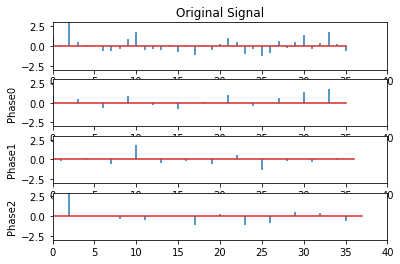

In [75]:
plt.subplot(411)
plt.stem(x,markerfmt=' ')
plt.axis([0,40,-3,3])
plt.title('Original Signal')
plt.subplot(412)
plt.stem(y0,markerfmt=' ')
plt.axis([0,40,-3,3])
plt.ylabel('Phase0')
plt.subplot(413)
plt.stem(y1,markerfmt=' ')
plt.axis([0,40,-3,3])
plt.ylabel('Phase1')
plt.subplot(414)
plt.stem(y2,markerfmt=' ')
plt.axis([0,40,-3,3])
plt.ylabel('Phase2')

如果对上采样的多相分量求和，就可以得到原始信号。

创建离散时间正弦信号，并以 2 为因子下采样以得到 2 个多相分量。

创建角频率为 $\pi/4$ 弧度/采样点的离散时间正弦波。将值为 2 的 DC 偏移量加到正弦波上，以帮助进行多相分量的可视化。对正弦波以 2 为因子下采样，以获得偶数和奇数多相分量。

In [76]:
n = np.linspace(0,127,128)
x = 2 + np.cos(np.pi/4*n)
x0 = downsample(x,2,0)
x1 = downsample(x,2,1)

对两个多相分量进行上采样。

In [77]:
y0 = upsample(x0,2,0)
y1 = upsample(x1,2,1)

绘制上采样后的多相分量和原始信号以进行比较。

Text(0, 0.5, 'Phase1')

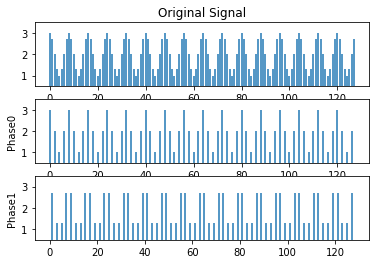

In [78]:
plt.subplot(311)
plt.stem(x,markerfmt=' ')
plt.ylim([0.5,3.5])
plt.title('Original Signal')
plt.subplot(312)
plt.stem(y0,markerfmt=' ')
plt.ylim([0.5,3.5])
plt.ylabel('Phase0')
plt.subplot(313)
plt.stem(y1,markerfmt=' ')
plt.ylim([0.5,3.5])
plt.ylabel('Phase1')

如果您对两个上采样后的多相分量（相位 0 和相位 1）求和，将得到原始正弦波。